In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4.5)
data = pd.read_csv("OutliersRemoved2.csv")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
import xgboost as xgb

In [ ]:
# drop all non_numericals except for province
data = data.drop(data.columns[[0,1,3,4,5]],axis = 1)

In [ ]:
plt.ylabel('Net worth (10,000 yuan)')
plt.xlabel("Total Volume of water sold (10,000 cubic metres/year)")
plt.title('Net Worth vs. Population')
plt.xticks(())
plt.yticks(())
plt.scatter(data["3.1. Total Volume of water sold (10,000 cubic metres/year)"],data['20.2. Net worth (10,000 yuan)'])


In [ ]:
print("Less water, lower net worth")

In [6]:
plt.ylabel("Overall rate of water that meets standard (%)  ")
plt.xlabel('Total city population with water access (10,000s)')
plt.title('Percentage of water meeting standard vs. Population')
plt.xticks(())
plt.yticks(())
plt.scatter(data['5.3. Total city population with water access (10,000s)'],data["14.1. Overall rate of water that meets standard (%)"])


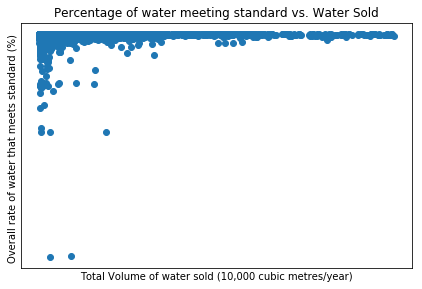

In [7]:
plt.ylabel("Overall rate of water that meets standard (%)  ")
plt.xlabel("Total Volume of water sold (10,000 cubic metres/year)")
plt.title('Percentage of water meeting standard vs. Water Sold')
plt.xticks(())
plt.yticks(())
plt.scatter(data["3.1. Total Volume of water sold (10,000 cubic metres/year)"],data["14.1. Overall rate of water that meets standard (%)"])



In [8]:
print("Less acceptable water for cities with less population and water sold")

Less acceptable water for cities with less population and water sold


In [9]:
# shuffle, test_train_split, and classifier
def create_frame(d):
    df = pd.DataFrame.copy(d)
    df = shuffle(df, random_state = 0)
    features = df.describe()
    # imputation by subbing with mean on copy of data
    for i in list(df):
        if(i != 'Province' and i != 'Year'):
            df[i] = df[i].fillna(features[i].loc["mean"])
    
    return df

In [10]:
df1 = create_frame(data)

In [11]:
print("without categorization, testing for Province\n")
X = df1
X = X.drop('Province', axis = 1)
Y = df1['Province']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 0)

without categorization, testing for Province



In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print("logistic regression training accuracy: ",logreg.score(X_train,Y_train))
print("logistic regression testing accuracy: ",logreg.score(X_test,Y_test) )

logistic regression training accuracy:  0.280777537797
logistic regression testing accuracy:  0.239202657807


In [13]:
svc = SVC()
svc.fit(X_train, Y_train)
print("SVM training accuracy: ",svc.score(X_train, Y_train))
print("SVM testing accuracy: ",svc.score(X_test,Y_test) )

SVM training accuracy:  0.832364180096
SVM testing accuracy:  0.090365448505


In [14]:
perceptron = Perceptron(max_iter = 1000, tol = None)
perceptron.fit(X_train, Y_train)
print("Perceptron training accuracy: ",perceptron.score(X_train, Y_train))
print("Perceptron testing accuracy: ",perceptron.score(X_test,Y_test) )

Perceptron training accuracy:  0.0714404386111
Perceptron testing accuracy:  0.0777408637874


In [34]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
print("KNN training accuracy: ",knn.score(X_train, Y_train))
print("KNN testing accuracy: ",knn.score(X_test,Y_test) )

KNN training accuracy:  0.479315500914
KNN testing accuracy:  0.214617940199


In [35]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
print("random forest training accuracy: ",random_forest.score(X_train, Y_train))
print("random forest testing accuracy: ",random_forest.score(X_test,Y_test) )

random forest training accuracy:  0.83552085064
random forest testing accuracy:  0.727574750831


In [36]:
gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(X_train, Y_train)
Y_pred = gradboost.predict(X_test)
acc_perceptron = round(gradboost.score(X_train, Y_train) * 100, 2)
print("xgboost training accuracy: ",round(gradboost.score(X_train, Y_train), 4))
print("xgboost testing accuracy: ",round(gradboost.score(X_test, Y_test), 4))

xgboost training accuracy:  0.8355
xgboost testing accuracy:  0.7362


In [37]:
# categorize all columns except for province and year for the second run
df2 = create_frame(data)
for i in list(df2):
    if(i != 'Province' and i != 'Year'):
        buckets = [str(i) for i in range(10)]
        classes = pd.cut(df2[i],10,labels=buckets)
        df2[i]  = classes.map({'0': 0, '1':1,'2': 2,'3':3,'4' :4,'5' :5,'6' :6,'7' :7,'8' :8,'9' :9})


In [38]:
print("with categorization\n")
X2 = df2
X2 = X2.drop('Province', axis =1)
Y2 = df2['Province']
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.20, random_state = 0)

with categorization



In [39]:
logreg2 = LogisticRegression()
logreg2.fit(X2_train, Y2_train)
print("logisitic regression training accuracy: ",logreg2.score(X2_train,Y2_train))
print("logisitic regression testing accuracy: ",logreg2.score(X2_test,Y2_test) )

logisitic regression training accuracy:  0.49509885363
logisitic regression testing accuracy:  0.439867109635


In [40]:
svc2 = SVC()
svc2.fit(X2_train, Y2_train)
print("SVM training accuracy: ",svc2.score(X2_train, Y2_train))
print("SVM testing accuracy: ",svc2.score(X2_test,Y2_test) )

SVM training accuracy:  0.64130254195
SVM testing accuracy:  0.523588039867


In [41]:
perceptron2 = Perceptron(max_iter = 2000, tol = None)
perceptron2.fit(X2_train, Y2_train)
print("Perceptron training accuracy: ",perceptron2.score(X2_train, Y2_train))
print("Perceptron testing accuracy: ",perceptron2.score(X2_test,Y2_test) )

Perceptron training accuracy:  0.139225785014
Perceptron testing accuracy:  0.122259136213


In [42]:
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X2_train, Y2_train)
print("KNN training accuracy: ",knn2.score(X2_train, Y2_train))
print("KNN testing accuracy: ",knn2.score(X2_test,Y2_test) )

KNN training accuracy:  0.668051171291
KNN testing accuracy:  0.473089700997


In [43]:
random_forest2 = RandomForestClassifier(n_estimators=1000)
random_forest2.fit(X2_train, Y2_train)
print("random forest training accuracy: ",random_forest2.score(X2_train, Y2_train))
print("random forest testing accuracy: ",random_forest2.score(X2_test,Y2_test) )

random forest training accuracy:  0.833361023426
random forest testing accuracy:  0.662458471761


In [44]:
gradboost2 = xgb.XGBClassifier(n_estimators=1000)
gradboost2.fit(X2_train, Y2_train)
Y_pred2 = gradboost2.predict(X2_test)
print("xgboost training accuracy: ",round(gradboost2.score(X2_train, Y2_train), 4))
print("xgboost testing accuracy: ",round(gradboost2.score(X2_test, Y2_test), 4))

xgboost training accuracy:  0.8315
xgboost testing accuracy:  0.6432


In [45]:
print("df1 (without categorization) xgboost holds the greatest accuracy")

df1 (without categorization) xgboost holds the greatest accuracy


In [46]:
def plot_model_var_imp( model , X , Y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[:10].plot( kind = 'barh' )
    print (model.score( X , Y ))

test importances for xgboost without categorization
0.736212624585


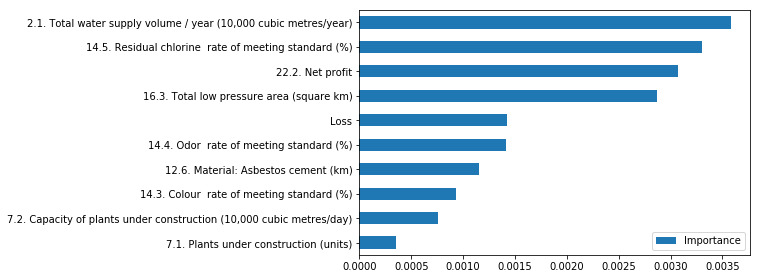

In [47]:
print("test importances for xgboost without categorization")
plot_model_var_imp(gradboost, X_test, Y_test)

test importances for random forest without categorization
0.727574750831


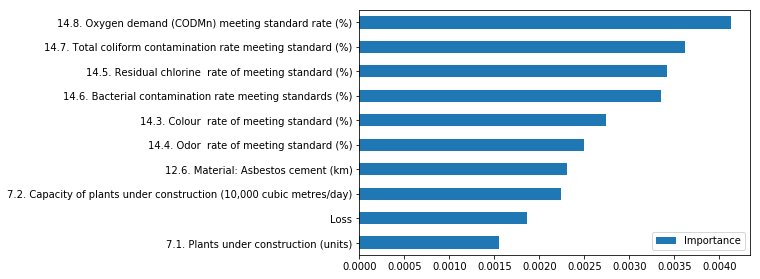

In [48]:
print("test importances for random forest without categorization")
plot_model_var_imp(random_forest, X_test, Y_test)

In [49]:
print("tune random forest using GridSearchCV")
from sklearn.model_selection import GridSearchCV
print(random_forest.get_params())


tune random forest using GridSearchCV
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [50]:
#function to plot parameter CV scores
def plot_params(param, num_range, index, classifier):
    grid_search = GridSearchCV(classifier, param_grid = {param: num_range})
    grid_search.fit(X_train, Y_train)
    
    df = {}
    results = grid_search.cv_results_
    for i,score in enumerate(results['params']):
        df[score[param]] = results['mean_test_score'][i]

    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(param)
    print(grid_search.best_params_)
    return plot, df
    

In [51]:
#param values to test: n_estimators, max_features and min_sample_leaf
param_vals = {"n_estimators": np.arange(1, 500, 20),"max_features": np.arange(1, 85, 1)}
              

{'n_estimators': 441}
{'max_features': 28}


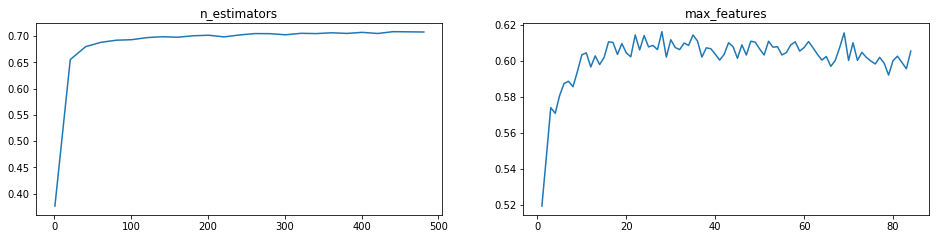

In [53]:
RF = RandomForestClassifier()
index = 1
plt.figure(figsize=(16,12))
for param, param_range in dict.items(param_vals):   
    plot_params(param, param_range, index, RF)
    index += 1

In [54]:
random_forest3 = RandomForestClassifier(n_estimators=301, max_features = 61)
random_forest3.fit(X_train, Y_train)
print("random forest training accuracy: ",random_forest3.score(X_train, Y_train))
print("random forest testing accuracy: ",random_forest3.score(X_test,Y_test) )
# no difference in tuning, general conclusion is to use more n_estimators and default max_features

random forest training accuracy:  0.83552085064
random forest testing accuracy:  0.690365448505


In [55]:
random_forest4 = RandomForestClassifier(n_estimators=2000)
random_forest4.fit(X_train, Y_train)
print("random forest training accuracy: ",random_forest3.score(X_train, Y_train))
print("random forest testing accuracy: ",random_forest3.score(X_test,Y_test) )

random forest training accuracy:  0.83552085064
random forest testing accuracy:  0.690365448505


In [56]:
print("tune xgboost using GridSearchCV")
print(gradboost.get_params())


tune xgboost using GridSearchCV
{'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 1000, 'nthread': -1, 'objective': 'multi:softprob', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1}


In [57]:
# fix this
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [58]:
#tune boosting params
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, Y_train, X_train)

TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column